In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime 
from pandas import Series
from numpy import log

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\StockPricePrediction\data\raw\Data Historis Jakarta Islamic.csv')
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,08/04/2025,"372,00","375,18","375,18","367,17","1,51B","-9,61%"
1,27/03/2025,"411,54","407,59","411,54","404,55","1,08B","0,68%"
2,26/03/2025,"408,77","399,44","411,19","399,44","1,49B","3,10%"
3,25/03/2025,"396,47","396,48","398,60","392,77","1,48B","0,51%"
4,24/03/2025,"394,46","406,24","406,62","381,72","1,68B","-2,96%"


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tanggal                2420 non-null   datetime64[ns]
 1   Terakhir               2420 non-null   float64       
 2   Pembukaan              2420 non-null   float64       
 3   Tertinggi              2420 non-null   float64       
 4   Terendah               2420 non-null   float64       
 5   Vol.                   2416 non-null   float64       
 6   Perubahan%             2420 non-null   float64       
 7   PriceTy                2420 non-null   float64       
 8   PriceVol               2416 non-null   float64       
 9   Cumulative             2416 non-null   float64       
 10  CumulativePriceVolume  2416 non-null   float64       
 11  VWAP                   2416 non-null   float64       
 12  Typical_Price          2420 non-null   float64       
 13  TPx

In [5]:
df.describe()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
count,2420,2420,2420,2420,2420,2416,2420
unique,2420,2308,2313,2306,2334,1543,534
top,08/04/2025,"731,14","577,42","698,08","570,10","1,11B","-0,31%"
freq,1,3,4,3,3,29,17


In [6]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2420 non-null   datetime64[ns]
 1   Terakhir    2420 non-null   object        
 2   Pembukaan   2420 non-null   object        
 3   Tertinggi   2420 non-null   object        
 4   Terendah    2420 non-null   object        
 5   Vol.        2416 non-null   object        
 6   Perubahan%  2420 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 132.5+ KB


In [8]:
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace(',', '.')
        multiplier = 1
        if vol_str.endswith('B'):
            multiplier = 1_000_000_000
            vol_str = vol_str.replace('B', '')
        elif vol_str.endswith('M'):
            multiplier = 1_000_000
            vol_str = vol_str.replace('M', '')
        elif vol_str.endswith('K'):
            multiplier = 1_000
            vol_str = vol_str.replace('K', '')
        return float(vol_str) * multiplier
    return vol_str

df['Vol.'] = df['Vol.'].apply(convert_volume)


In [9]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2025-04-08,"372,00","375,18","375,18","367,17",1.510000e+09,"-9,61%"
1,2025-03-27,"411,54","407,59","411,54","404,55",1.080000e+09,"0,68%"
2,2025-03-26,"408,77","399,44","411,19","399,44",1.490000e+09,"3,10%"
3,2025-03-25,"396,47","396,48","398,60","392,77",1.480000e+09,"0,51%"
4,2025-03-24,"394,46","406,24","406,62","381,72",1.680000e+09,"-2,96%"


In [10]:
df['Terakhir'] = df['Terakhir'].astype(str).str.replace(',', '.').astype(float)
df['Pembukaan'] = df['Pembukaan'].astype(str).str.replace(',', '.').astype(float)
df['Tertinggi'] = df['Tertinggi'].astype(str).str.replace(',', '.').astype(float)
# df['Perubahan%'] = df['Perubahan%'].astype(str).str.replace(',', '.').astype(float)

In [11]:
df['Terendah'] = df['Terendah'].astype(str).str.replace(',', '.').astype(float)

In [12]:
df['Perubahan%'] = df['Perubahan%'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)


In [13]:
df['PriceTy'] = (df['Tertinggi'] + df['Terendah'] + df['Terakhir']) / 3
df['PriceVol'] = df['PriceTy'] * df['Vol.']
df['Cumulative'] = df['Vol.'].cumsum()
df['CumulativePriceVolume'] = df['PriceVol'].cumsum()
df['VWAP'] = df['CumulativePriceVolume'] / df['Cumulative']

In [14]:
df['Typical_Price'] = (df['Tertinggi'] + df['Terendah'] + df['Terakhir']) / 3
df['TPxVol'] = df['Typical_Price'] * df['Vol.']
df['Cum_TPxVol'] = df['TPxVol'].cumsum()
df['Cum_Vol'] = df['Vol.'].cumsum()
df['VWAP'] = df['Cum_TPxVol'] / df['Cum_Vol']

In [15]:
df.isnull().sum()

Tanggal                  0
Terakhir                 0
Pembukaan                0
Tertinggi                0
Terendah                 0
Vol.                     4
Perubahan%               0
PriceTy                  0
PriceVol                 4
Cumulative               4
CumulativePriceVolume    4
VWAP                     4
Typical_Price            0
TPxVol                   4
Cum_TPxVol               4
Cum_Vol                  4
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
DataFrame = df[['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%', 'VWAP']]

In [18]:
DataFrame.head(10)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,VWAP
0,2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,-9.61,371.450000
1,2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,0.68,387.195483
2,2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,3.10,394.233243
3,2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,0.51,394.689335
4,2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,-2.96,394.591257
5,2025-03-21,406.49,413.90,414.29,403.12,2.570000e+09,-1.55,398.095314
6,2025-03-20,412.89,407.78,414.14,407.30,1.490000e+09,1.98,399.855363
7,2025-03-19,404.89,402.92,407.69,396.07,1.300000e+09,0.98,400.167772
8,2025-03-18,400.94,419.17,419.77,384.86,2.280000e+09,-3.95,400.426555
9,2025-03-17,417.44,415.43,420.81,415.22,1.320000e+09,1.05,401.844070


<Axes: >

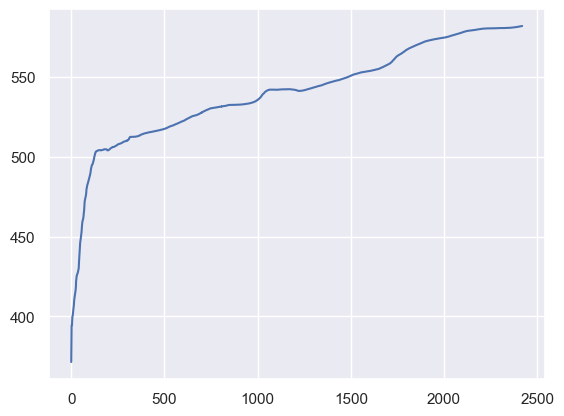

In [19]:
DataFrame['VWAP'].plot()

In [20]:
DataFrame.iloc[0:200]

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,VWAP
0,2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,-9.61,371.450000
1,2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,0.68,387.195483
2,2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,3.10,394.233243
3,2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,0.51,394.689335
4,2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,-2.96,394.591257
...,...,...,...,...,...,...,...,...
195,2024-06-13,496.32,502.35,503.64,496.07,7.000000e+09,-0.50,504.040562
196,2024-06-12,498.83,500.69,502.52,496.99,5.890000e+09,0.12,504.008798
197,2024-06-11,498.26,505.89,507.32,498.26,6.540000e+09,-1.96,503.988008
198,2024-06-10,508.19,511.49,511.79,503.61,1.352000e+10,-0.60,504.048099


In [21]:
import statsmodels.api as sm

In [22]:
dFrame = DataFrame[['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.','VWAP']]

In [23]:
dFrame.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP
0,2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,371.450000
1,2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,387.195483
2,2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243
3,2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335
4,2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257


In [24]:
# dFrame.dropna()
dFrame = dFrame.dropna().reset_index(drop=True)

In [25]:
dFrame

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP
0,2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,371.450000
1,2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,387.195483
2,2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243
3,2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335
4,2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257
...,...,...,...,...,...,...,...
2411,2015-04-13,717.43,719.20,720.84,713.53,5.811700e+08,581.831781
2412,2015-04-10,722.08,724.44,724.59,718.09,5.134900e+08,581.851310
2413,2015-04-09,723.85,721.60,723.85,719.43,4.559000e+08,581.868742
2414,2015-04-08,719.99,726.52,727.51,718.39,5.924100e+08,581.891320


In [26]:
# dFrame['VWAP'].dropna()
# dFrame['Vol.'].dropna()

In [26]:
dFrame['VWAP']

0       371.450000
1       387.195483
2       394.233243
3       394.689335
4       394.591257
           ...    
2411    581.831781
2412    581.851310
2413    581.868742
2414    581.891320
2415    581.913928
Name: VWAP, Length: 2416, dtype: float64

In [27]:

dFrame['Vol.']

0       1.510000e+09
1       1.080000e+09
2       1.490000e+09
3       1.480000e+09
4       1.680000e+09
            ...     
2411    5.811700e+08
2412    5.134900e+08
2413    4.559000e+08
2414    5.924100e+08
2415    5.749200e+08
Name: Vol., Length: 2416, dtype: float64

In [28]:

print(dFrame.isnull().sum())


Tanggal      0
Terakhir     0
Pembukaan    0
Tertinggi    0
Terendah     0
Vol.         0
VWAP         0
dtype: int64


In [29]:
print(sm.stats.durbin_watson(dFrame['VWAP']))
print(sm.stats.durbin_watson(dFrame['Pembukaan']))
print(sm.stats.durbin_watson(dFrame['Terakhir']))
print(sm.stats.durbin_watson(dFrame['Vol.']))
print(sm.stats.durbin_watson(dFrame['Tertinggi']))
print(sm.stats.durbin_watson(dFrame['Terendah']))

6.338684725004011e-07
0.00013639758508092597
0.0001390771595159202
0.3025879466250448
9.074691017887627e-05
0.00013079322039769384


In [30]:
dFrame.describe()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000
mean,2020-03-30 12:54:14.304635904,618.513974,619.083829,623.002881,614.176014,1.521659e+09,540.875051
min,2015-04-07 00:00:00,372.000000,375.180000,375.180000,367.170000,2.620200e+08,371.450000
25%,2017-10-04 18:00:00,553.135000,553.127500,556.775000,548.650000,7.153725e+08,522.688953
50%,2020-03-26 12:00:00,611.530000,612.490000,616.890000,607.465000,1.010000e+09,542.207349
75%,2022-09-26 06:00:00,689.457500,689.730000,693.797500,685.005000,1.480000e+09,568.074504
max,2025-04-08 00:00:00,798.770000,796.920000,799.150000,791.200000,3.491000e+10,581.913928
std,NaN,81.427398,81.353015,81.155879,81.462214,1.845827e+09,31.711890


In [32]:
dFrame.nunique()

Tanggal      2416
Terakhir     2306
Pembukaan    2311
Tertinggi    2304
Terendah     2332
Vol.         1543
VWAP         2416
dtype: int64

In [31]:
dFrame1 = dFrame.copy()

In [32]:
dFrame1

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP
0,2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,371.450000
1,2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,387.195483
2,2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243
3,2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335
4,2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257
...,...,...,...,...,...,...,...
2411,2015-04-13,717.43,719.20,720.84,713.53,5.811700e+08,581.831781
2412,2015-04-10,722.08,724.44,724.59,718.09,5.134900e+08,581.851310
2413,2015-04-09,723.85,721.60,723.85,719.43,4.559000e+08,581.868742
2414,2015-04-08,719.99,726.52,727.51,718.39,5.924100e+08,581.891320


In [37]:
dFrame1.set_index('Tanggal', inplace=True)

In [38]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP
Tanggal,,,,,,
2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,371.450000
2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,387.195483
2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243
2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335
2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257
...,...,...,...,...,...,...
2015-04-13,717.43,719.20,720.84,713.53,5.811700e+08,581.831781
2015-04-10,722.08,724.44,724.59,718.09,5.134900e+08,581.851310
2015-04-09,723.85,721.60,723.85,719.43,4.559000e+08,581.868742


In [39]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP
Tanggal,,,,,,
2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,371.450000
2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,387.195483
2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243
2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335
2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257
...,...,...,...,...,...,...
2015-04-13,717.43,719.20,720.84,713.53,5.811700e+08,581.831781
2015-04-10,722.08,724.44,724.59,718.09,5.134900e+08,581.851310
2015-04-09,723.85,721.60,723.85,719.43,4.559000e+08,581.868742


In [40]:
start_date = dFrame1.index.min()
end_date = dFrame1.index.max()

In [41]:
print("Start Date of Stocks :", start_date)
print("End Date of Stocks :", end_date)

Start Date of Stocks : 2015-04-07 00:00:00
End Date of Stocks : 2025-04-08 00:00:00


<Axes: xlabel='Tanggal'>

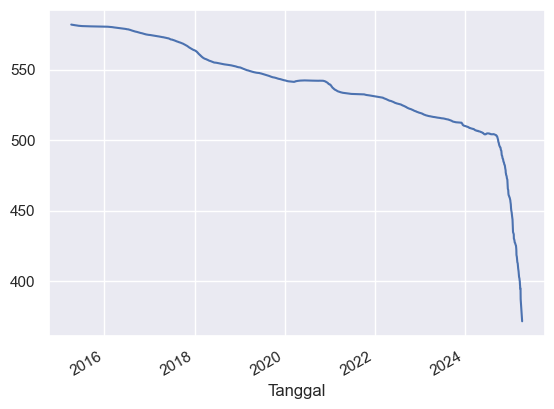

In [42]:
dFrame1['VWAP'].plot()

In [43]:
dFrame1['Time_Stamp'] = pd.DataFrame(DataFrame, columns=['Tanggal'])

In [44]:
DataFrame['Tanggal']

0      2025-04-08
1      2025-03-27
2      2025-03-26
3      2025-03-25
4      2025-03-24
          ...    
2415   2015-04-13
2416   2015-04-10
2417   2015-04-09
2418   2015-04-08
2419   2015-04-07
Name: Tanggal, Length: 2420, dtype: datetime64[ns]

In [45]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP,Time_Stamp
Tanggal,,,,,,,
2025-04-08,372.00,375.18,375.18,367.17,1.510000e+09,371.450000,NaT
2025-03-27,411.54,407.59,411.54,404.55,1.080000e+09,387.195483,NaT
2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243,NaT
2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335,NaT
2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257,NaT
...,...,...,...,...,...,...,...
2015-04-13,717.43,719.20,720.84,713.53,5.811700e+08,581.831781,NaT
2015-04-10,722.08,724.44,724.59,718.09,5.134900e+08,581.851310,NaT
2015-04-09,723.85,721.60,723.85,719.43,4.559000e+08,581.868742,NaT


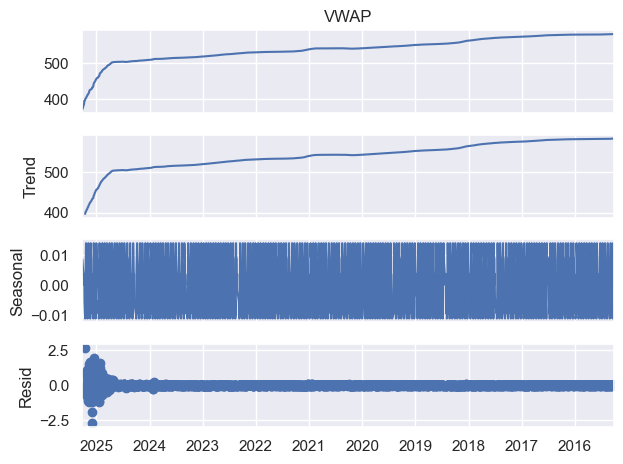

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompse = seasonal_decompose(dFrame1['VWAP'],
model='additive', period=12)
decompse.plot()
plt.show()

In [47]:
trend = decompse.trend
seasonality = decompse.seasonal
residual = decompse.resid
print('Trend', '\n', trend.head(12),'\n')
print('Seasoanlity', '\n', seasonality.head(12),'\n')
print('Residual', '\n', residual.head(12),'\n')

Trend 
 Tanggal
2025-04-08           NaN
2025-03-27           NaN
2025-03-26           NaN
2025-03-25           NaN
2025-03-24           NaN
2025-03-21           NaN
2025-03-20    397.169961
2025-03-19    399.325928
2025-03-18    400.619508
2025-03-17    401.735249
2025-03-14    402.982727
2025-03-13    404.188490
Name: trend, dtype: float64 

Seasoanlity 
 Tanggal
2025-04-08    0.008675
2025-03-27    0.000183
2025-03-26    0.003859
2025-03-25   -0.001542
2025-03-24   -0.005434
2025-03-21   -0.009130
2025-03-20   -0.004961
2025-03-19   -0.010824
2025-03-18   -0.009368
2025-03-17    0.004705
2025-03-14    0.013990
2025-03-13    0.009848
Name: seasonal, dtype: float64 

Residual 
 Tanggal
2025-04-08         NaN
2025-03-27         NaN
2025-03-26         NaN
2025-03-25         NaN
2025-03-24         NaN
2025-03-21         NaN
2025-03-20    2.690364
2025-03-19    0.852668
2025-03-18   -0.183585
2025-03-17    0.104116
2025-03-14   -0.099460
2025-03-13   -0.295298
Name: resid, dtype: float64 

In [48]:

dFrame1['Bulan'] = dFrame1.index.month
dFrame1['Tahun'] = dFrame1.index.year
# dFrame1.head()
dFrame1.tail()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP,Time_Stamp,Bulan,Tahun
Tanggal,,,,,,,,,
2015-04-13,717.43,719.20,720.84,713.53,581170000.0,581.831781,NaT,4,2015
2015-04-10,722.08,724.44,724.59,718.09,513490000.0,581.851310,NaT,4,2015
2015-04-09,723.85,721.60,723.85,719.43,455900000.0,581.868742,NaT,4,2015
2015-04-08,719.99,726.52,727.51,718.39,592410000.0,581.891320,NaT,4,2015
2015-04-07,727.56,723.80,728.28,723.54,574920000.0,581.913928,NaT,4,2015


In [ ]:
# dFrame1['VWAP_diff'] = dFrame1['VWAP'].diff().dropna().reset_index(drop=True)

In [ ]:
dFrame1

In [49]:
dFrame1.index.min()
dFrame1.index.max()

Timestamp('2025-04-08 00:00:00')

In [51]:
dFrame1 = dFrame1.sort_index(ascending=True)

# Now do the split
split_date = dFrame1.index[int(len(dFrame) * 0.8)]
train = dFrame1[:split_date]
test = dFrame1[split_date:]

print(f"Train data: {train.index[0]} to {train.index[-1]}")
print(f"Test data : {test.index[0]} to {test.index[-1]}")

Train data: 2015-04-07 00:00:00 to 2023-03-15 00:00:00
Test data : 2023-03-15 00:00:00 to 2025-04-08 00:00:00


In [52]:
train['VWAP']

Tanggal
2015-04-07    581.913928
2015-04-08    581.891320
2015-04-09    581.868742
2015-04-10    581.851310
2015-04-13    581.831781
                 ...    
2023-03-09    517.105249
2023-03-10    517.083782
2023-03-13    517.062950
2023-03-14    517.036382
2023-03-15    517.001425
Name: VWAP, Length: 1933, dtype: float64

In [53]:
test['VWAP']

Tanggal
2023-03-15    517.001425
2023-03-16    516.976890
2023-03-17    516.953339
2023-03-20    516.921622
2023-03-21    516.898388
                 ...    
2025-03-24    394.591257
2025-03-25    394.689335
2025-03-26    394.233243
2025-03-27    387.195483
2025-04-08    371.450000
Name: VWAP, Length: 484, dtype: float64

In [54]:
from statsmodels.tsa.stattools import adfuller
adfuller(train['VWAP'])

(0.16385448700261107,
 0.9701598588879178,
 19,
 1913,
 {'1%': -3.433772946369569,
  '5%': -2.8630520356606137,
  '10%': -2.567574949489954},
 -11364.409471243778)

In [55]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey-Fuller Test")
    labels = ['ADF Test Statistic', 'P-Value', '#Lags Used', 'Number of Observations Used']
    
    for label, value in zip(labels, result[:4]):
        print(f"{label} -----> {value}")
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis (unit root). The time series is **stationary**.")
    else:
        print("\nWeak evidence against the null hypothesis. The time series is **non-stationary**.")
        
check_adftest(train['VWAP'])

Augmented Dickey-Fuller Test
ADF Test Statistic -----> 0.16385448700261107
P-Value -----> 0.9701598588879178
#Lags Used -----> 19
Number of Observations Used -----> 1913

Weak evidence against the null hypothesis. The time series is **non-stationary**.


In [56]:
import numpy as np

In [57]:
dFrameDiff = dFrame1.copy()

In [58]:
dFrameDiff['log_VWAP'] = np.log(dFrameDiff['VWAP'])

In [59]:
def make_stationary(series):
    
    differenced_series = series.diff().dropna()
    return differenced_series


vwap_diff = make_stationary(train['VWAP'])


check_adftest(vwap_diff)

Augmented Dickey-Fuller Test
ADF Test Statistic -----> -3.878131047342384
P-Value -----> 0.0022018171549776384
#Lags Used -----> 18
Number of Observations Used -----> 1913

Strong evidence against the null hypothesis (unit root). The time series is **stationary**.


In [60]:
dFrameDiff

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP,Time_Stamp,Bulan,Tahun,log_VWAP
Tanggal,,,,,,,,,,
2015-04-07,727.56,723.80,728.28,723.54,5.749200e+08,581.913928,NaT,4,2015,6.366323
2015-04-08,719.99,726.52,727.51,718.39,5.924100e+08,581.891320,NaT,4,2015,6.366284
2015-04-09,723.85,721.60,723.85,719.43,4.559000e+08,581.868742,NaT,4,2015,6.366245
2015-04-10,722.08,724.44,724.59,718.09,5.134900e+08,581.851310,NaT,4,2015,6.366215
2015-04-13,717.43,719.20,720.84,713.53,5.811700e+08,581.831781,NaT,4,2015,6.366181
...,...,...,...,...,...,...,...,...,...,...
2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257,NaT,3,2025,5.977850
2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335,NaT,3,2025,5.978099
2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243,NaT,3,2025,5.976943


In [61]:
dFrameDiff = dFrameDiff.sort_index(ascending=True)

# Now do the split
split_date = dFrameDiff.index[int(len(dFrameDiff) * 0.8)]
trainlog = dFrameDiff[:split_date]
testlog = dFrameDiff[split_date:]

print(f"Train data: {train.index[0]} to {train.index[-1]}")
print(f"Test data : {test.index[0]} to {test.index[-1]}")

Train data: 2015-04-07 00:00:00 to 2023-03-15 00:00:00
Test data : 2023-03-15 00:00:00 to 2025-04-08 00:00:00


In [62]:
trainlog['log_VWAP']

Tanggal
2015-04-07    6.366323
2015-04-08    6.366284
2015-04-09    6.366245
2015-04-10    6.366215
2015-04-13    6.366181
                ...   
2023-03-09    6.248246
2023-03-10    6.248205
2023-03-13    6.248165
2023-03-14    6.248113
2023-03-15    6.248046
Name: log_VWAP, Length: 1933, dtype: float64

In [ ]:
dFrameDiff

In [63]:
dFrameDiff['log_diff'] = dFrameDiff['log_VWAP'].diff().dropna()

In [64]:
dFrameDiff

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,VWAP,Time_Stamp,Bulan,Tahun,log_VWAP,log_diff
Tanggal,,,,,,,,,,,
2015-04-07,727.56,723.80,728.28,723.54,5.749200e+08,581.913928,NaT,4,2015,6.366323,NaN
2015-04-08,719.99,726.52,727.51,718.39,5.924100e+08,581.891320,NaT,4,2015,6.366284,-0.000039
2015-04-09,723.85,721.60,723.85,719.43,4.559000e+08,581.868742,NaT,4,2015,6.366245,-0.000039
2015-04-10,722.08,724.44,724.59,718.09,5.134900e+08,581.851310,NaT,4,2015,6.366215,-0.000030
2015-04-13,717.43,719.20,720.84,713.53,5.811700e+08,581.831781,NaT,4,2015,6.366181,-0.000034
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,394.46,406.24,406.62,381.72,1.680000e+09,394.591257,NaT,3,2025,5.977850,-0.008841
2025-03-25,396.47,396.48,398.60,392.77,1.480000e+09,394.689335,NaT,3,2025,5.978099,0.000249
2025-03-26,408.77,399.44,411.19,399.44,1.490000e+09,394.233243,NaT,3,2025,5.976943,-0.001156


In [65]:
dFrameDiff['log_diff_2'] = dFrameDiff['log_diff'].diff().dropna()

In [66]:
check_adftest(dFrameDiff['log_diff_2'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic -----> 2.824097443138625
P-Value -----> 1.0
#Lags Used -----> 27
Number of Observations Used -----> 2386

Weak evidence against the null hypothesis. The time series is **non-stationary**.


In [67]:
vwap_diff

Tanggal
2015-04-08   -0.022608
2015-04-09   -0.022579
2015-04-10   -0.017432
2015-04-13   -0.019529
2015-04-14   -0.021426
                ...   
2023-03-09   -0.025358
2023-03-10   -0.021467
2023-03-13   -0.020832
2023-03-14   -0.026568
2023-03-15   -0.034957
Name: VWAP, Length: 1932, dtype: float64

In [68]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [69]:
kurtosis_value = vwap_diff.kurtosis()


In [70]:
print(kurtosis_value)

4.712208036844876


In [71]:
skewness_value = vwap_diff.skew()


In [72]:
print(skewness_value)

-1.4291097118462093


In [73]:
from pmdarima import auto_arima



In [74]:
auto_model = auto_arima(vwap_diff, seasonal=False, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11474.514, Time=3.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11003.181, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11266.952, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11455.323, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11005.181, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11476.848, Time=1.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11478.473, Time=1.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-11476.060, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11474.058, Time=1.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11482.116, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11484.336, Time=5.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-11484.097, Time=1.45 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-11479.620, Time=4.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-11485.502, Time=4.19 sec
 ARIM

In [75]:
model = ARIMA(vwap_diff, order=(0,1,5))
result = model.fit()
print(result.summary())

D:\anaconda2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   VWAP   No. Observations:                 1932
Model:                 ARIMA(0, 1, 5)   Log Likelihood                5751.025
Date:                Thu, 10 Apr 2025   AIC                         -11490.049
Time:                        13:02:31   BIC                         -11456.654
Sample:                             0   HQIC                        -11477.765
                               - 1932                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5163      0.012    -42.299      0.000      -0.540      -0.492
ma.L2         -0.1094      0.016     -6.907      0.000      -0.140      -0.078
ma.L3         -0.0592      0.016     -3.747      0.0

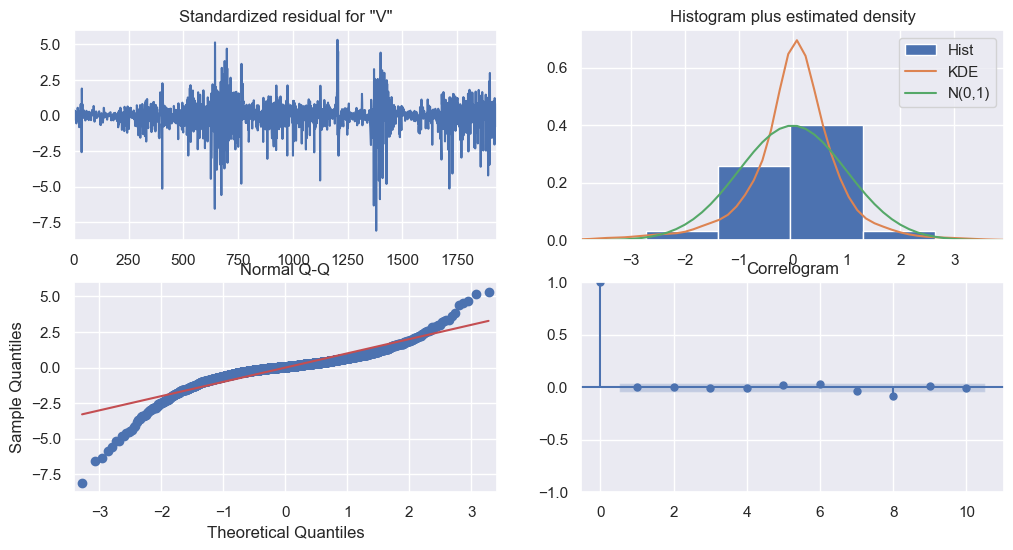

In [76]:
result.plot_diagnostics(figsize=(12, 6))
plt.show()

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dFrame1['VWAP'].values.reshape(-1, 1))
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 10  
X, y = create_sequences(scaled_data, n_steps)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [78]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1313
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
Epoch 16/50
61/61 ━

In [ ]:
X_train

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


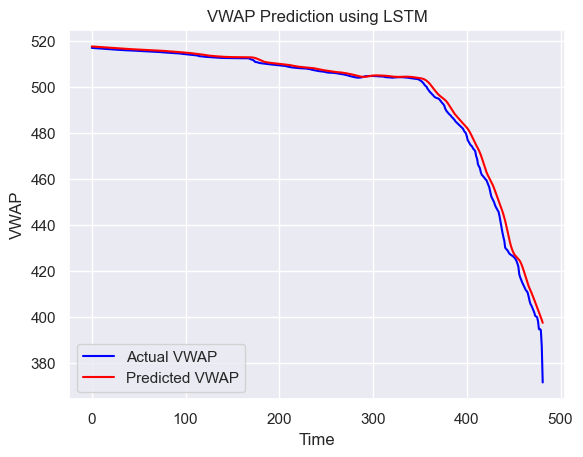

In [79]:

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


import matplotlib.pyplot as plt

plt.plot(y_test_rescaled, color='blue', label='Actual VWAP')
plt.plot(predictions, color='red', label='Predicted VWAP')
plt.title('VWAP Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('VWAP')
plt.legend()
plt.show()


In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f"RMSE: {rmse}")
mae = math.sqrt(mean_absolute_error(y_test_rescaled, predictions))
print(f"MAE: {mae}")

RMSE: 2.9144672040045427
MAE: 1.3114407813139333


In [82]:
mean_price = dFrame1['VWAP'].mean()

In [83]:
print(mean_price)

540.875051327133


In [84]:
mae_percent = (1.55/541) *100
print(mae_percent)

0.28650646950092423


In [85]:
import pickle



In [86]:
model.save('lstm_model.h5')

In [87]:
data ={
    'scaler' : scaler,
    'model_path':'lstm_model.h5'
}
with open('model_lstm.pkl', 'wb') as f:
    pickle.dump(data,f)

In [88]:
from keras.models import load_model

with open('model_lstm.pkl', 'rb') as f:
    data = pickle.load(f)

scaler = data['scaler']
model = load_model(data['model_path'])

In [ ]:
base_value = 541  # Based on the mean you calculated
new_data = []

for i in range(20):
    # Create slightly variable data with an upward trend
    random_factor = np.random.normal(0, 10)  # Random noise
    trend_factor = i * 0.5  # Small upward trend
    daily_value = base_value + trend_factor + random_factor
    new_data.append(daily_value)

# Convert to numpy array and reshape for scaling
new_data = np.array(new_data).reshape(-1, 1)
print("Generated test data sample:")
print(new_data[:5])

# 3. Scale the data using the saved scaler
scaled_data = scaler.transform(new_data)

# 4. Prepare sequences for LSTM prediction (n_steps=10 as in your training)
n_steps = 10
X_test = []

# We need at least n_steps + 1 data points to make a prediction
if len(new_data) > n_steps:
    for i in range(len(scaled_data) - n_steps):
        X_test.append(scaled_data[i:i + n_steps])
    
    X_test = np.array(X_test)
    # Reshape X_test to match the input shape expected by the LSTM model
    X_test = X_test.reshape(X_test.shape[0], n_steps, 1)
    
    # 5. Make predictions
    predictions = model.predict(X_test)
    
    # 6. Inverse transform to get the actual values
    original_predictions = scaler.inverse_transform(predictions)
    
    print("\nPredictions for future VWAP values:")
    for i, pred in enumerate(original_predictions):
        print(f"Day {i+1}: Predicted VWAP: {pred[0]:.2f}")
    
    # 7. Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(new_data[n_steps:], label='Test Data (Synthetic)')
    plt.plot(original_predictions, label='Predicted Values', color='red')
    plt.title('VWAP Predictions on New Test Data')
    plt.xlabel('Time Steps')
    plt.ylabel('VWAP')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 8. Example of how to use this for real-time prediction
    print("\nExample of next-day prediction:")
    # Take the last n_steps elements as input for the next prediction
    last_sequence = scaled_data[-n_steps:].reshape(1, n_steps, 1)
    next_prediction = model.predict(last_sequence)
    next_prediction = scaler.inverse_transform(next_prediction)[0][0]
    print(f"Next day VWAP prediction: {next_prediction:.2f}")
    
else:
    print("Error: Need at least", n_steps + 1, "data points to make predictions.")

In [ ]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler

NaN values in dataset before cleaning: 4
NaN values in dataset after cleaning: 0
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Number of test examples: 951
Root Mean Squared Error (RMSE): 2.18
Mean Absolute Error (MAE): 1.11
Mean VWAP in test data: 510.34
MAE as percentage of mean VWAP: 0.22%


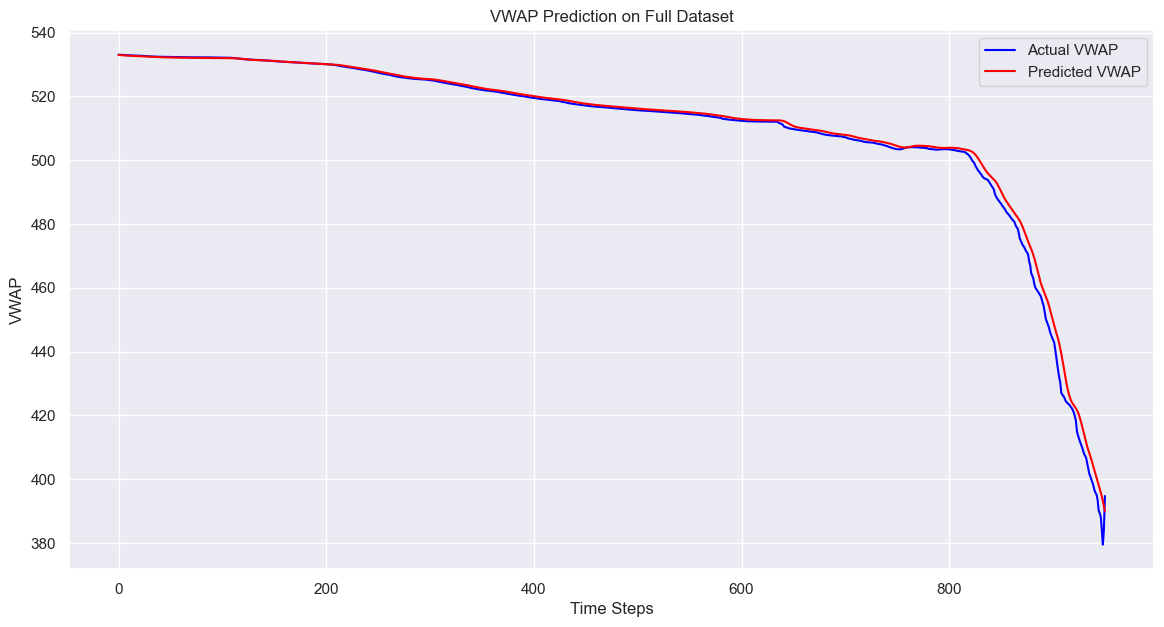

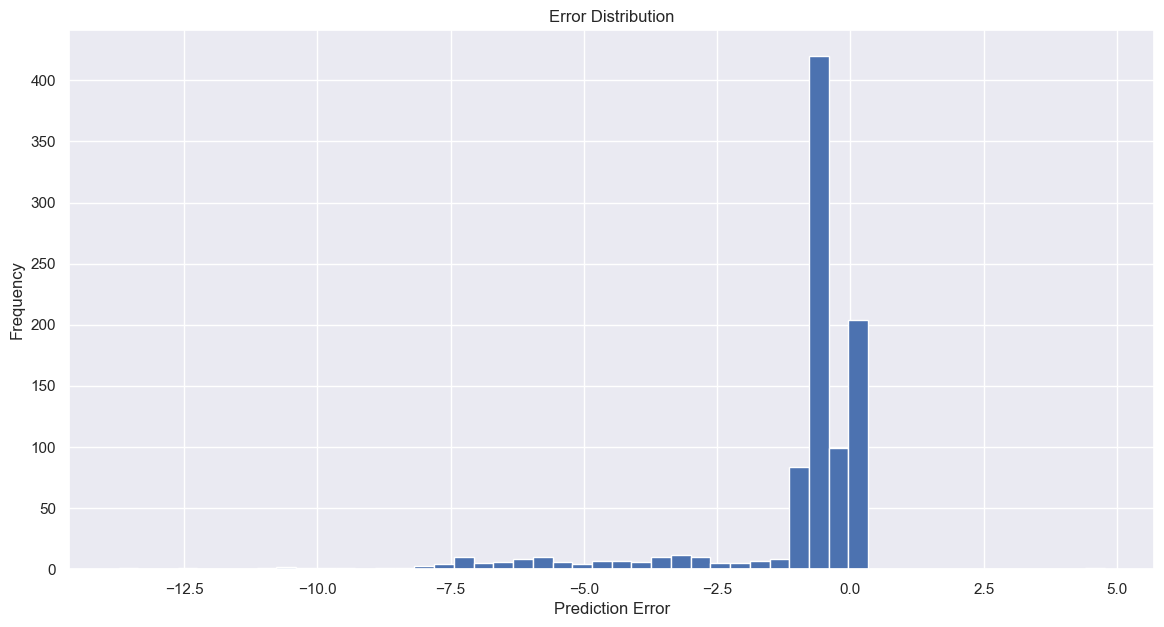

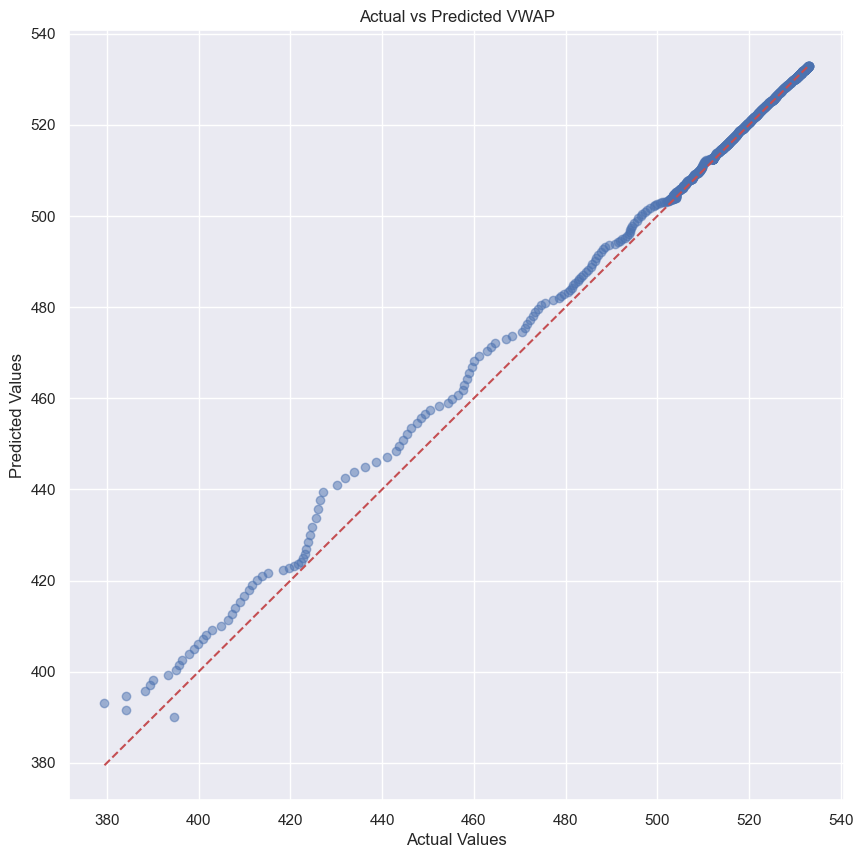

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Next day VWAP prediction: 388.87

Test results saved to 'lstm_full_results.csv'


In [92]:
# 2. Load your original dataset
dftest = pd.read_csv(r'C:\Users\LENOVO\Documents\StockPricePrediction\data\raw\data_test.csv')

# 3. Apply the same preprocessing steps as in your original code
dftest['Tanggal'] = pd.to_datetime(dftest['Tanggal'], format='%d/%m/%Y')

# Convert volume using your function
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace(',', '.')
        multiplier = 1
        if vol_str.endswith('B'):
            multiplier = 1_000_000_000
            vol_str = vol_str.replace('B', '')
        elif vol_str.endswith('M'):
            multiplier = 1_000_000
            vol_str = vol_str.replace('M', '')
        elif vol_str.endswith('K'):
            multiplier = 1_000
            vol_str = vol_str.replace('K', '')
        return float(vol_str) * multiplier
    return vol_str

dftest['Vol.'] = dftest['Vol.'].apply(convert_volume)
dftest['Terakhir'] = dftest['Terakhir'].astype(str).str.replace(',', '.').astype(float)
dftest['Pembukaan'] = dftest['Pembukaan'].astype(str).str.replace(',', '.').astype(float)
dftest['Tertinggi'] = dftest['Tertinggi'].astype(str).str.replace(',', '.').astype(float)
dftest['Terendah'] = dftest['Terendah'].astype(str).str.replace(',', '.').astype(float)
dftest['Perubahan%'] = dftest['Perubahan%'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Calculate VWAP as you did in your original code
dftest['Typical_Price'] = (dftest['Tertinggi'] + dftest['Terendah'] + dftest['Terakhir']) / 3
dftest['TPxVol'] = dftest['Typical_Price'] * dftest['Vol.']
dftest['Cum_TPxVol'] = dftest['TPxVol'].cumsum()
dftest['Cum_Vol'] = dftest['Vol.'].cumsum()
dftest['VWAP'] = dftest['Cum_TPxVol'] / dftest['Cum_Vol']

# Check for NaN values and handle them
print(f"NaN values in dataset before cleaning: {dftest['VWAP'].isna().sum()}")

# Handle NaN values - either drop or fill them
dftest = dftest.dropna(subset=['VWAP']).reset_index(drop=True)

print(f"NaN values in dataset after cleaning: {dftest['VWAP'].isna().sum()}")

# Sort by date to ensure chronological order
dftest = dftest.sort_values('Tanggal').reset_index(drop=True)

# Use ALL VWAP values for testing (no splitting)
test_data = dftest['VWAP'].values.reshape(-1, 1)

# Double check for any remaining NaN values in the test data
if np.isnan(test_data).any():
    print("Warning: Test data still contains NaN values. Cleaning...")
    # Create a mask of non-NaN values
    mask = ~np.isnan(test_data.flatten())
    # Filter out NaN values
    test_data = test_data[mask].reshape(-1, 1)
    print(f"Test data shape after removing NaN values: {test_data.shape}")

# IMPORTANT: Load or recreate the scaler used during training
# You should have saved this during training, or recreate it here
# For example, if you know the original min/max values:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(original_training_data)  # You would need the original training data

# If you saved the scaler during training, load it:
# from joblib import load
# scaler = load('scaler.joblib')

# If you can't get the original scaler, you'll need to fit a new one on this data
# (though this isn't ideal for real evaluation)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(test_data)  # Note: This isn't ideal for true evaluation

# Scale the test data
scaled_test_data = scaler.transform(test_data)

# 6. Create sequences for LSTM input
n_steps = 10  # Same as in your training
X_test = []
y_test = []

for i in range(len(scaled_test_data) - n_steps):
    X_test.append(scaled_test_data[i:i + n_steps])
    y_test.append(scaled_test_data[i + n_steps])

X_test = np.array(X_test)
y_test = np.array(y_test)

# Check if we have enough data after sequence creation
if len(X_test) == 0:
    print("Error: Not enough data points after NaN removal to create sequences.")
    exit()

# Reshape X_test to match LSTM input shape [samples, time steps, features]
X_test = X_test.reshape(X_test.shape[0], n_steps, 1)

# 7. Make predictions
predictions = model.predict(X_test)

# 8. Inverse transform predictions and actual values
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# 9. Calculate performance metrics
rmse = math.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)

print(f"Number of test examples: {len(X_test)}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean VWAP in test data: {np.mean(actual_values):.2f}")
print(f"MAE as percentage of mean VWAP: {(mae/np.mean(actual_values))*100:.2f}%")

# 10. Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual_values, color='blue', label='Actual VWAP')
plt.plot(predicted_values, color='red', label='Predicted VWAP')
plt.title('VWAP Prediction on Full Dataset')
plt.xlabel('Time Steps')
plt.ylabel('VWAP')
plt.legend()
plt.grid(True)
plt.show()

# 11. Plot the error distribution
errors = actual_values - predicted_values
plt.figure(figsize=(14, 7))
plt.hist(errors, bins=50)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 12. Additional visualization: Actual vs Predicted scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'r--')
plt.title('Actual vs Predicted VWAP')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 13. Next-Day Prediction Example (only if enough data is available)
if len(scaled_test_data) >= n_steps:
    # Get the most recent data points from your dataset
    last_sequence = scaled_test_data[-n_steps:].reshape(1, n_steps, 1)
    next_prediction = model.predict(last_sequence)
    next_prediction = scaler.inverse_transform(next_prediction)[0][0]
    print(f"\nNext day VWAP prediction: {next_prediction:.2f}")
else:
    print("\nNot enough data points for next-day prediction.")

# 14. Save the test results to CSV
results_df = pd.DataFrame({
    'Actual_VWAP': actual_values.flatten(),
    'Predicted_VWAP': predicted_values.flatten(),
    'Error': errors.flatten()
})
results_df.to_csv('lstm_full_results.csv', index=False)
print("\nTest results saved to 'lstm_full_results.csv'")

In [ ]:
# 1. Ambil data VWAP dari dftest
vwap_data = dftest['VWAP'].values.reshape(-1, 1)

# 2. Load scaler dan model dari file pickle
with open('model_lstm.pkl', 'rb') as f:
    data = pickle.load(f)

scaler = data['scaler']
model_path = data['model_path']
model = load_model(model_path)

# 3. Scaling VWAP
scaled_vwap = scaler.transform(vwap_data)

# 4. Buat sequence untuk input model LSTM
def create_sequences(data, n_steps):
    X = []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
    return np.array(X)

n_steps = 10  # Sesuai n_steps saat training model
X_test = create_sequences(scaled_vwap, n_steps)

# 5. Prediksi
predicted_scaled = model.predict(X_test)
predicted_vwap = scaler.inverse_transform(predicted_scaled)

# 6. Data VWAP aktual (disesuaikan dengan panjang prediksi)
actual_vwap = vwap_data[n_steps:]

# 7. Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(actual_vwap, label='Actual VWAP', color='blue')
plt.plot(predicted_vwap, label='Predicted VWAP', color='red')
plt.title('Prediksi VWAP vs Aktual')
plt.xlabel('Time Step')
plt.ylabel('VWAP')
plt.legend()
plt.grid(True)
plt.show()